<a href="https://colab.research.google.com/github/jnieus01/Dinov2-review/blob/main/code_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code Demo - Image Classification

In [ ]:
!pip install huggingface-cli

In [ ]:
!pip install transformers datasets evaluate

In [ ]:
!huggingface-cli login

In [ ]:
from transformers import AutoImageProcessor, Dinov2ForImageClassification, AutoModel
from transformers import pipeline
import torch
import random
from datasets import load_dataset
from PIL import Image
import requests

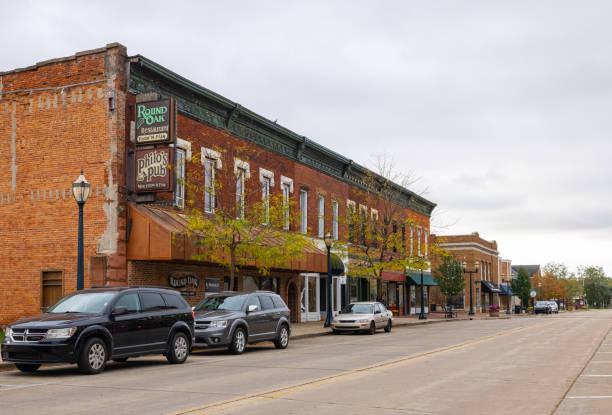

In [ ]:
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

### Image Classification

In [ ]:
image_processor = AutoImageProcessor.from_pretrained("facebook/dinov2-small-imagenet1k-1-layer")
model = Dinov2ForImageClassification.from_pretrained("facebook/dinov2-small-imagenet1k-1-layer")

inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

cinema, movie theater, movie theatre, movie house, picture palace


## Citation

Oquab, M., Darcet, T., Moutakanni, T., Vo, H., Szafraniec, M., Khalidov, V., Fernandez, P., Haziza, D., Massa, F., El-Nouby, A., Assran, M., Ballas, N., Galuba, W., Howes, R., Huang, P.-Y., Li, S.-W., Misra, I., Rabbat, M., Sharma, V., … Bojanowski, P. (2024). DINOv2: Learning Robust Visual Features without Supervision (arXiv:2304.07193). arXiv. http://arxiv.org/abs/2304.07193
